# Supervised Learning with sckit-learn
- William Surles
- 2017-11-27
- Datacamp class
- [https://www.datacamp.com/courses/supervised-learning-with-scikit-learn](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn)

## Whats Covered
**Classification**
- Supervised learning
- Exploratory data analysis
- The classification challenge
- Measuring model performance

**Regression**
- Introduction to regression
- The basics of linear regression
- Cross-validation
- Regularized regression

**Fine-tuning your model**
- How good is your model?
- Logistic regression and the ROC curve
- Area under the ROC curve
- Hyperparameter tuning
- Hold-out set for final evaluation

**Preprocessing and pipelines**
- Preprocessing data
- Handling missing data
- Centering and scaling
- Final thoughts

## Additonal Resources

## Libraries and Data

In [45]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# Classification

## Supervised learning

#### What is machine learning
- the art and science of:
 - Giving computers the ability to learn to make decisions from data
 - ... without being explicitly programmed!
- Examples:
 - Learning to predict whether an email is spam or not
 - Clustering wikipedia entries into different categories
- Supervised learning: Uses labeled data
- Unsupervised learning: uses unlabeled data
- Reinfocemnet learning: uses an environment with punishments and rewards to train future behavior

#### Unsupervised Learning
- Uncovering hidden patterns from unlabeled data
- Example:
 - Grouping customers into distinct categories (Clustering)
 
#### Reinforcement learning
- Software agents interact with an environment
 - Learn how to optimize their behavior
 - given a system fo rewards and punishments
 - Draws inspiration from behavioral pyschology
- Applications
 - Economics
 - Genetics
 - Game playing
- AlphaGo: First computer to defeat the world champion in Go

#### Supervised Learning
- Predictor variables/features and a target variable
- Aim: Predict the target variable, given the predictor variables
 - Classification: Target variable consists of categories
 - Regression: Target variable is continuous

**Naming Conventions**
 - Features = predictor variables = independent variables
 - Target variable = dependent variable = response variable

**In practice**
- Automate time-consuming or expensive maual tasks
 - Example: Doctor's diagnosis
- Make predictions about the future
 - Example: Will a customer click on an ad or not?
- Need Labeled data
 - Historical data with labels
 - Experiments to get labeled data
 - Crowd-sourcing labeled data
 
**In Python**
- We wil use scikit-learn/sklearn
 - Integrates well with the SciPy stack
- Other libaries
 - TensorFlow
 - keras


### Which of these is a classification problem?

- Classification (Supervised)
 - Using labeled financial data to predict whether the value of a stock will go up or go down next week.
- Regression (Supervised) 
 - Using labeled housing price data to predict the price of a new house based on various features.
 - Using labeled financial data to predict what the value of a stock will be next week.
- Clustering (Unsupervised)
 - Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles.

## Exploratory data analysis

The Iris dataset
- Features:
 - Petal length
 - petal width
 - Sepal length
 - Sepal width
- Target variable: Species
 - Versicolor
 - Verginica
 - Setosa

#### The Iris dataset in scikit-learn

- This data comes in a 'Bunch' which is kind of like a dictionary.

In [6]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

- Here are the keys. We can see that the data and the target are separate. 
- Also the target is integers and the corresponding names are held in target_names
- There is also a description which is nice
- But the target_names and feature_names are separate
 - We will need to combine these as we do EDA on the data

In [15]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [17]:
iris.data[:6,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4]])

In [19]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [22]:
iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

#### EDA

In [24]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


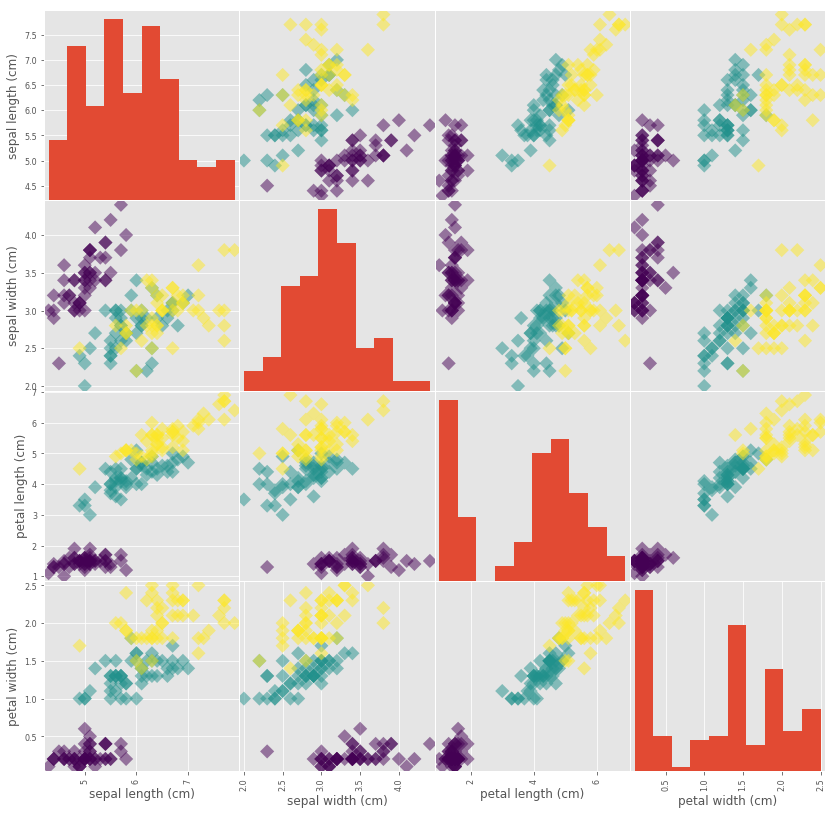

In [34]:
_ = pd.plotting.scatter_matrix(
    df,
    c = y,
    figsize = [14,14],
    s = 100,
    marker = 'D')
plt.show()

### Numerical EDA
- In this chapter, we'll be working with a dataset obtained from the UCI Machine Learning Repository consisting of votes made by US House of Representatives Congressmen. 
- Our goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. 
- The data has been preproceesed
 - We will practice the processing techniques on this data in chp 4
- Before thinking about what supervised learning models we can apply to this, we will perform EDA in order to understand the structure of the data. 

In [59]:
%run data.py

In [60]:
vote_clean = pd.DataFrame(data = vote_clean_list, columns = vote_clean_columns)
vote_clean.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [61]:
vote_clean.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [63]:
vote_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 57.9+ KB


In [64]:
vote_clean.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations
- The dataframe has a total of 435 rows and 17 columns
- Except for `party`, all of the columns are of type `int64`.
- The first two rows of the dataframe consist of votes made by republicans, and then next three rows consist of votes made by democrats
- There are 16 _predictor variables_, or _features_, in this dataframe 
 - And one target variable, `party`.

### Visual EDA
- In the video we used the `scatter_matrix()` but here we have all binary data so a `countplot()` (from `seaborn`) is more appropriate.
 - We will look at the `countplot()` for a few variables
 - We will make the colors match the party affiliations

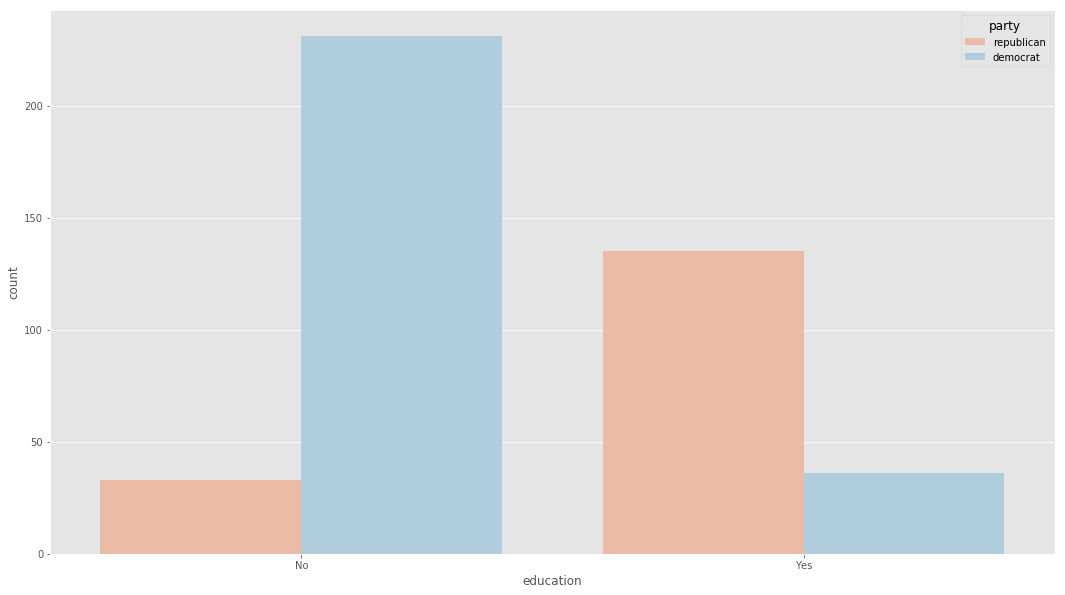

In [56]:
plt.figure(figsize=(18,10))
sns.countplot(x='education', hue='party', data=vote_clean, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

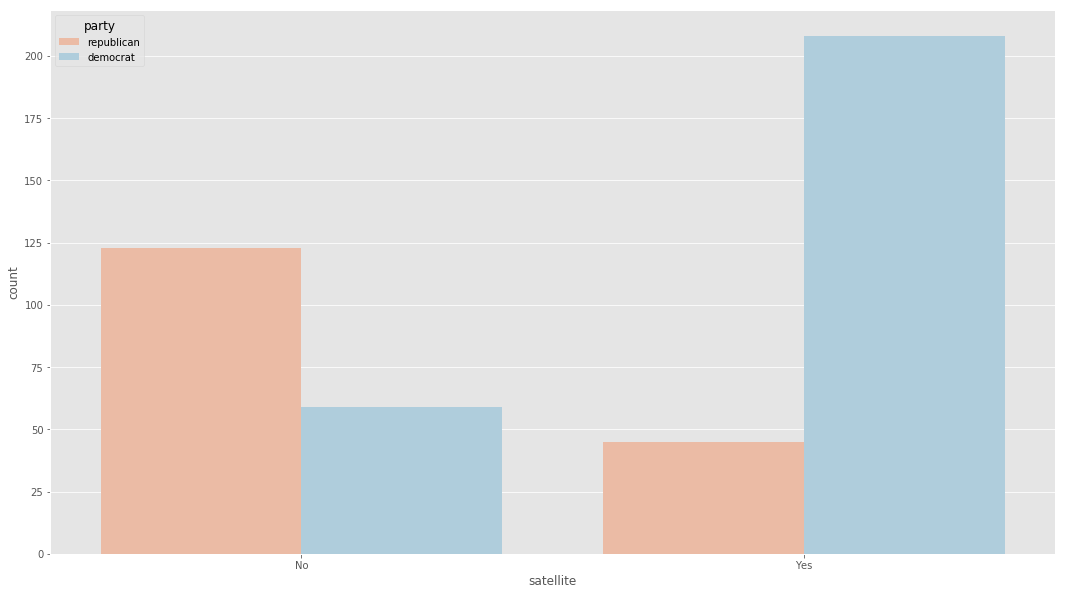

In [57]:
plt.figure(figsize=(18,10))
sns.countplot(x='satellite', hue='party', data=vote_clean, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

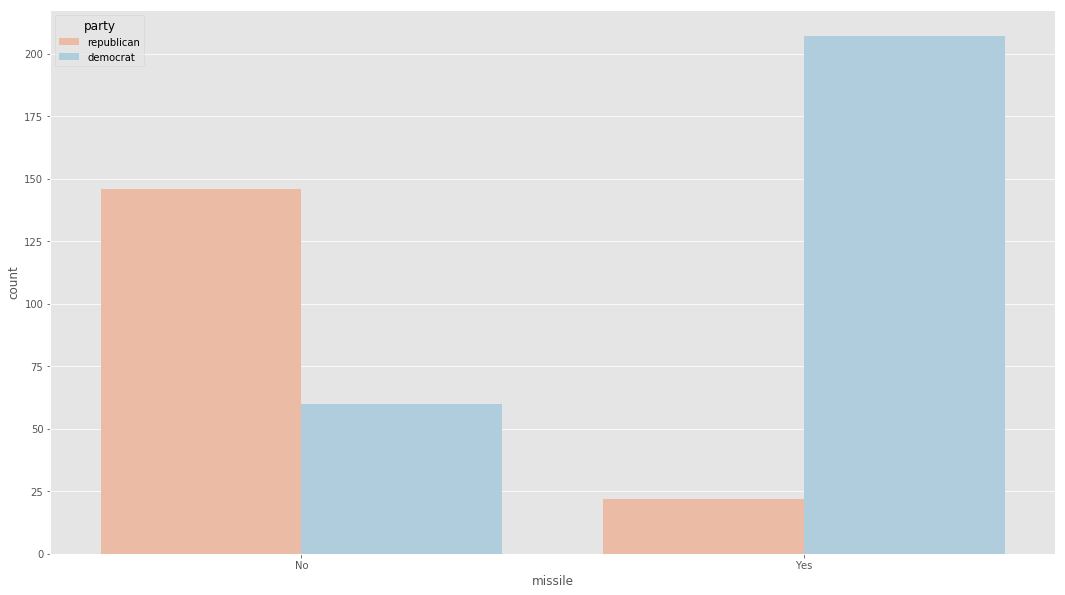

In [58]:
plt.figure(figsize=(18,10))
sns.countplot(x='missile', hue='party', data=vote_clean, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

#### Observations
- Repblicans wer much more in favor of education and more against the satelite and missile issue. 
- We don't know what the actual question was, but we can certainly see how the parties vote differently. 
- This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. 
 - An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

## The classification challenge

#### k-Nearest Neighbors
- Basic idea: Predict the label of a data point by
 - Looking at the 'k' closest labeled data points
 - Taking a majority vote

#### Oversimple example
- If it were knn 3 than the center dot would be red since its 3 nearest neighbors are 2 red and 1 green
- If it were knn 5 than it would be green. 3 green and 2 red  

<img src="images/knn_example.png" style="width: 500px;"/>


#### k-NN: Intuition
- At some point things converge and you have your groups

<img src="images/knn_intuition.png" style="width: 500px;"/>

#### Scikit-learn fit and predict
- All machine learning models implemented as python classes
 - They implement the algorithms for learning and predicting
 - Store the information learned from the data
- Training a model on the data = 'fitting' a model to the data
 - `.fit()` method
- To predict the labels of new data: 
 - `.predict()` method

#### Using scikit-learn to fit a classifier
- The scikit-learn api requires:
 - data as a numpy array or pandas data frame
 - the feature take on continuous values (like the price of a house, as opposed to a category, big or small house)
 - no missing values in the data
 - the features are in an array where each column is a feature and each row is an observation


In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [66]:
iris['data'].shape

(150, 4)

In [67]:
iris['target'].shape

(150,)

#### Prediciting on unlabeled data

In [83]:
X_new = iris['data'][[0,10,100,149],:] + np.random.random((4, 4))
X_new

array([[ 5.63579548,  3.69526006,  2.39491435,  0.99927652],
       [ 5.85420111,  4.32159932,  2.25312407,  0.88594226],
       [ 7.17551685,  3.46663087,  6.78221806,  2.66418147],
       [ 6.32438588,  3.06505403,  5.8126895 ,  2.21704665]])

In [84]:
prediction = knn.predict(X_new)
X_new.shape
print('Prediction {}'. format(prediction))

Prediction [0 0 2 2]


- the first two are setosa and the second two are virginica

### k-Nearest Neighbors: Fit

- Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. 
- Without using .values, X and y are a DataFrame and Series respectively; 
 - the scikit-learn API will accept them in this form also as long as they are of the right shape.

In [85]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = vote_clean['party'].values
X = vote_clean.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

### k-Nearest Neighbors: Predict

- Having fit a k-NN classifier, you can now use it to predict the label of a new data point. 
 - However, there is no unlabeled data available since all of it was used to fit the model! 
 - You can still use the .predict() method on the X that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data.

- In the next video we will cover splitting our data to fix this issues
 - For now, a random unlabeled data point has been generated and is available to you as X_new. 
 - You will use your classifier to predict the label for this new data point, as well as on the training data X that the model has already seen. 
 - Using .predict() on X_new will generate 1 prediction, while using it on X will generate 435 predictions: 1 for each sample.

In [89]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = vote_clean['party'].values
X = vote_clean.drop('party', axis = 1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)
print(y_pred[0:10])

['republican' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'republican' 'republican' 'republican' 'democrat']


In [97]:
# Predict and print the label for the new data point X_new
X_new = np.array([[0.72251225,  0.61952487,  0.25539929,  0.34978056,  0.04279606,
         0.64407096,  0.74224677,  0.26632645,  0.90179262,  0.73532079,
         0.96163873,  0.98119655,  0.79379732,  0.29022046,  0.44359749,
         0.95018481]])

In [98]:
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


## Measuring model performance

- In classification, accuracy is a commonly used metric
- Accuracy = Fraction of correct predictions
- Which data should be used to compute accuracy?
- How well will the model perform on new data?
- Could compute accuracy on data used to fit classifier...
 - Not indicative of ability to generalize
- Split data into rraining and test set
 - Fit/train the classifier on the training set
 - make predictions on test set
 - Compare predictions with the known labels

#### Train/test split
- `test_size` is the proportion of data that will be in the test set
- `random_state` sets a seed for the random number generator so later you can reporoduce you results later
- `stratify` ensures that our data is split so it has similar ratios of target labels in both test and train as in the original data

In [103]:
from sklearn.model_selection import train_test_split

X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 21, 
    stratify = y)

- Now we just train on the train data
- And test on the test data
- then we can score by comaring our y predictions to the actual y test data

In [104]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n{}".format(y_pred))

Test set predictions:
[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [105]:
knn.score(X_test, y_test)

0.9555555555555556

#### Model complexity
- If we use very few neighbors we will get a more jagged decision boundary
 - This will over fit data so that new data is not predictied as well
- Many neighbors will lead to a very smooth decision boundary. 
 - this may underfit the data so our model cannnot describe the data as accurately as needed
 
<img src="images/model_complexity.png" style="width: 700px;"/>

#### Model complexity and over/underfitting
- Here we can see that if our model is **too** simple (as in very large n) it does not do well on the training or test data.
- If we just set the neighbors to 1 you will have a very complex model that fits the training data very tightly, but when applying that model to the test data it will be low acuracy becuase its over fit on the training data. 
- We want to find the sweet spot in the middle where we get the highes accuracy on new data. 
 - This will probably never be as good as any of the models fit to the training data but the point is to predict new data so thats how it is.
 
<img src="images/model_complexity_curve.png" style="width: 500px;"/>

### The digits recognition dataset

- In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! 
 - A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.
- Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. 
 - Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. 
 - Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys  - Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images

In [107]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [108]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


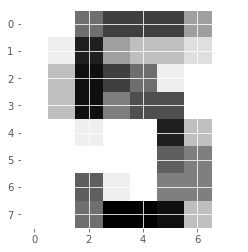

In [109]:
# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test Split + Fit/Predict/Accuracy

In [110]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2, 
    random_state = 42, 
    stratify = y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))


0.983333333333


- Okay so in a split second, this out of the box knn model predicts the hand written digits with over 98% accuracy.
- Thats impressive for sure
- I think I am on to the bginning of something magical here

### Overfitting and underfitting

- We will now construct such a model complexity curve for the digits dataset! 
- In this exercise, we will compute and plot the training and testing accuracy scores for a variety of different neighbor values. 
- By observing how the accuracy scores differ for the training and testing sets with different values of k, we will develop our intuition for overfitting and underfitting

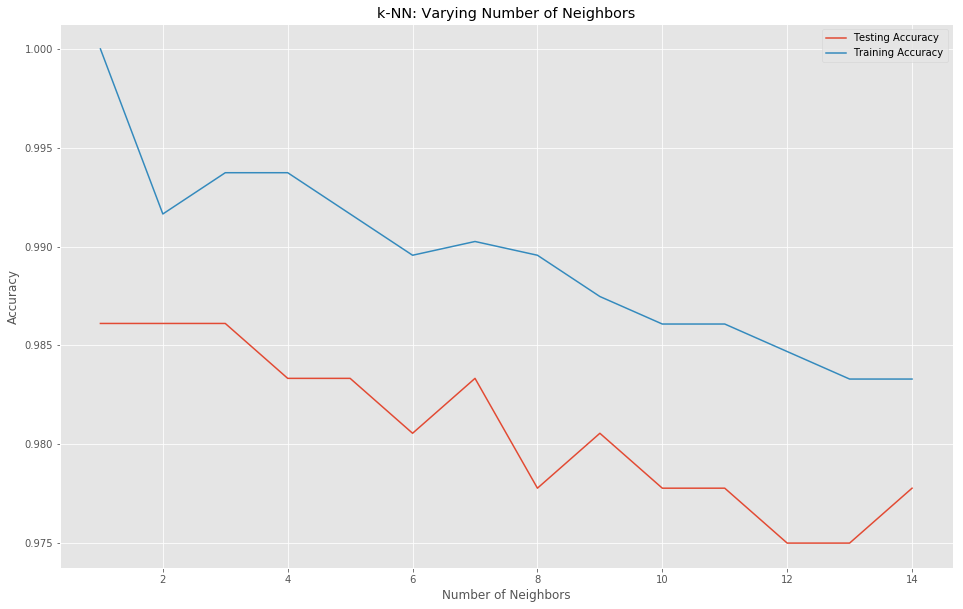

In [113]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(16,10))
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


- Welp, it looks like our value of 7 neighbors may be to many and creating an over simple model. 
 - Its seems to drop off after that. 
 - Probably 3 would be the best model to use here. 

# Regression

## Introduction to regression

#### Boston housing data

In [114]:
file = 'https://assets.datacamp.com/production/course_1939/datasets/boston.csv'
boston = pd.read_csv(file)
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Creating feature and target arrays

In [115]:
X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values

#### Predicting house value from a single feature

In [118]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [119]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1, 1)

#### Plotting house values vs. number of rooms

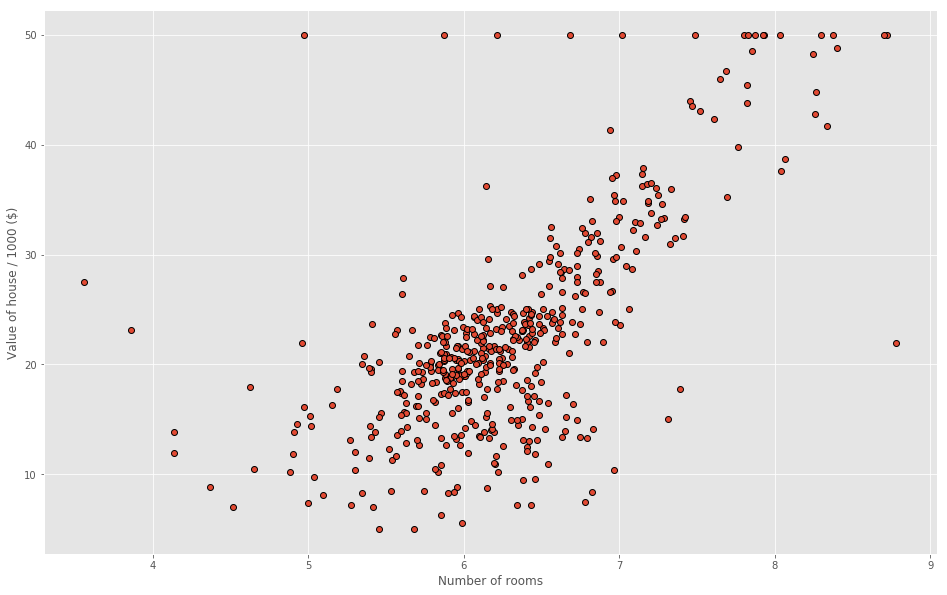

In [124]:
plt.figure(figsize=(16,10))
plt.plot(X_rooms, y,
    marker='o',
    markersize = 6,
    markeredgewidth = 1,
    markeredgecolor = 'k',
    linestyle='none')
plt.ylabel('Value of house / 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

#### Fitting a regression model

In [125]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(X_rooms, y)

prediction_space = np.linspace(
    min(X_rooms),
    max(X_rooms)).reshape(-1,1)

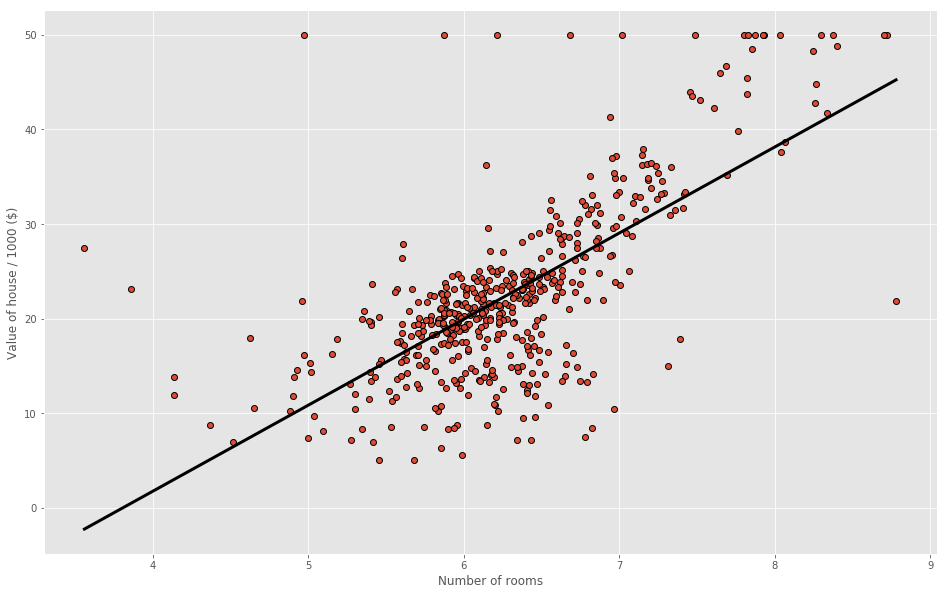

In [126]:
plt.figure(figsize=(16,10))

plt.plot(X_rooms, y,
    marker='o',
    markersize = 6,
    markeredgewidth = 1,
    markeredgecolor = 'k',
    linestyle='none')

plt.plot(
    prediction_space, 
    reg.predict(prediction_space), 
    color = 'black',
    linewidth=3)

plt.ylabel('Value of house / 1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

### Importing data for supervised learning

- In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. 
 - Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. 
 - As in Chapter 1, the dataset has been preprocessed.
- Since the target variable here is quantitative, this is a regression problem. 
 - To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. 
 - In later exercises, you will use all the features to build regression models.
- You need to import the data and get it into the form needed by scikit-learn. 
 - This involves creating feature and target variable arrays. 
 - Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. 
 - You will have to do this occasionally when working with scikit-learn so it is useful to practice.

In [128]:
file = 'https://assets.datacamp.com/production/course_1939/datasets/gm_2008_region.csv'
gapminder = pd.read_csv(file)
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [129]:
# Create arrays for features and target variable
y = gapminder.life
X = gapminder.fertility

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


/Users/williamsurles/anaconda3/envs/python_datacamp/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/Users/williamsurles/anaconda3/envs/python_datacamp/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


### Exploring the Gapminder data

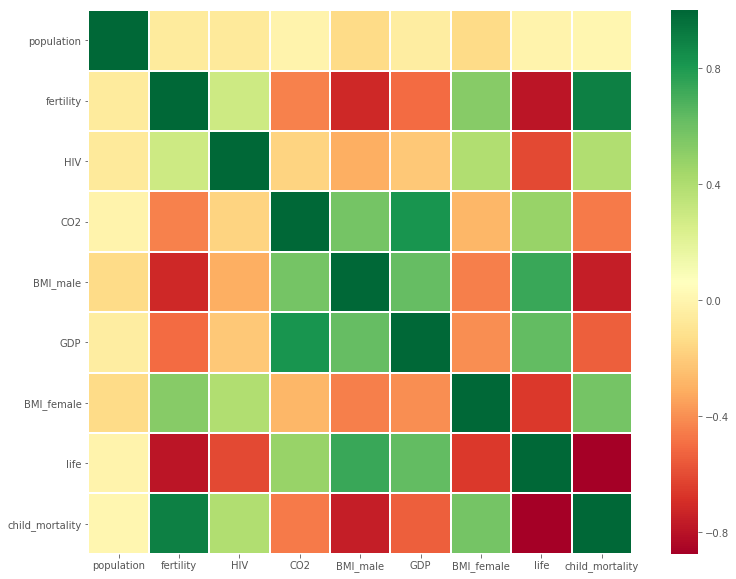

In [143]:
plt.figure(figsize=(14,10))

sns.heatmap(
    gapminder.corr(), 
    square = True,
    cmap="RdYlGn",
    linewidths = 1)

plt.show()

In [144]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [145]:
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


## The basics of linear regression

#### Regression mechanics
- We will fit a line to the data with form:
 - y = ax + b
 - y = target
 - x = single feature
 - a,b = parameters of model
- How do we choose a and b?
 - Define an error function for any given line
 - Choose the line that minimized the error function
 - This erro function can also be called a loss or cost function
 
#### The loss function
- Intitavely, we want the line to be as close to the actual data points as possible
- So we wish to minimize the vertical distance between the fit (line) and the data
 - For each data point we calculate the vertical distance between it and the line
 - This distance is called a residual
- We minimize the sum of the squares of the residuals
 - I'd like to learn more about all the options here though
 - this is called ordinary least squares (OLS)
 - This is similar to minimizing the mean squarred error of the predictions on the training set
- When you call `.fit()` on a linear regression model in scikit-learn it performs this OLS under the hood

#### Linear regression in higher dimension

- To fit a linear regression model here:
 - $ y = a_1x_1 + a_2x_2 + b $
 - Need to specify 3 variables, a_1, a_2, and b
- In higher simension:
 - $ y = a_1x_1 + a_2x_2 + a_3x_3 + a_nx_n + b $
 - Must specify coefficient for each feature and the variable b
- Scikit-learn API works exactly the same way:
 - Pass two arrays: Features, and target

#### Linear regression on all features

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.3, 
    random_state = 42)

reg_all = linear_model.LinearRegression()

reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

reg_all.score(X_test, y_test)
    

0.72989873609074984

- The default scoring method for linear regression is called r-squared
 - Intuitiavely this feature quantifies the amount of variance in the target variable that is predicted from the feature variables
- Also not the you will likely never use linear regression out of the boc like this
 - we will use regularization to place further constraints on the model coefficents
 - we will cover this later in the chapter

### Fit & predict for regression

In [149]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [153]:
X_fertility = gapminder.fertility.values.reshape(-1, 1)
y = gapminder.life.values

In [155]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(
    min(X_fertility), 
    max(X_fertility)
    ).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

0.619244216774


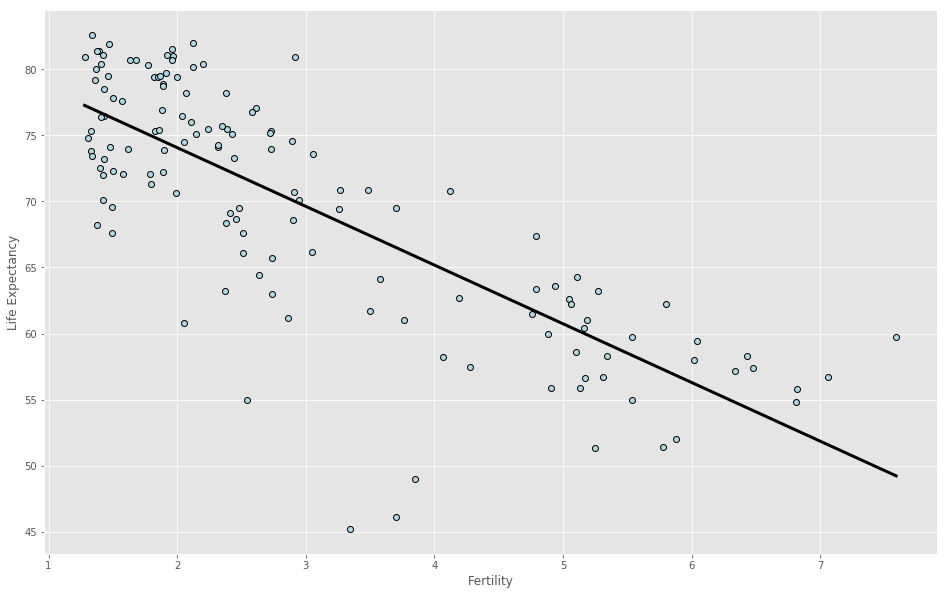

In [159]:
plt.figure(figsize=(16,10))

plt.plot(X_fertility, y,
    marker='o',     
    markersize = 6,
    color = 'lightblue',
    markeredgewidth = 1,
    markeredgecolor = 'k',
    linestyle='none')

plt.plot(
    prediction_space, 
    y_pred, 
    color = 'black',
    linewidth=3)

plt.ylabel('Life Expectancy')
plt.xlabel('Fertility')
plt.show()

### Train/test split for regression

- As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. 
- This was true for classification models, and is equally true for linear regression models.

In [162]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [163]:
X = gapminder.drop(['life','Region'], axis = 1).values
y = gapminder.life.values

In [165]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3, 
    random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


- Cool, we have improved our model significantly by using all of the data

## Cross-validation

- One issue with just doing 1 train and test validation
 - Model performance is dependent on way the data is split
 - Not representative of the models's ability to generalize
- Solution - Cross-validation
![](images/cross_validation.png)

#### Cross-validation and model performance
- 5 folds = 5-fold CV
- 10 folds = 10-fold CV
- k folds = k-fold CV
- More folds = More computationally expensive

#### Cross-validation in scikit-learn

In [171]:
X = boston.drop('MEDV', axis = 1).values
y = boston['MEDV'].values

from sklearn.model_selection import cross_val_score

reg = linear_model.LinearRegression()

cv_results = cross_val_score(reg, X, y, cv = 5)

print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [172]:
np.mean(cv_results)

0.35327592439586775

### 5-fold cross-validation

- Cross-validation is a vital step in evaluating a model. 
 - It maximizes the amount of data that is used to train the model
 - as during the course of training, the model is not only trained, but also tested on all of the available data.

- By default, scikit-learn's cross_val_score() function uses R2R2 as the metric of choice for regression. 
- Since you are performing 5-fold cross-validation, the function will return 5 scores. 

In [173]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = gapminder.drop(['life','Region'], axis = 1).values
y = gapminder.life.values

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

[ 0.81720569  0.82917058  0.90214134  0.80633989  0.94495637]


In [174]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.8599627722793505


### K-Fold CV comparison

In [176]:
# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv = 3)
print(np.mean(cvscores_3))

0.871871278262


In [177]:
# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv = 10)
print(np.mean(cvscores_10))

0.843612862013


In [178]:
%timeit cross_val_score(reg, X, y, cv = 3)

2.5 ms ± 114 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [179]:
%timeit cross_val_score(reg, X, y, cv = 10)

7.86 ms ± 260 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Regularized regression

### Regularization I: Lasso

### Regularization II: Ridge

# Fine-tuning your model

## How good is your model?

### Metrics for classification

## Logistic regression and the ROC curve

### Building a logistic regression model

### Plotting an ROC curve

### Precision-recall Curve

## Area under the ROC curve

### AUC computation

## Hyperparameter tuning

### Hyperparameter tuning with GridSearchCV

### Hyperparameter tuning with RandomizedSearchCV

## Hold-out set for final evaluation

### Hold-out set reasoning

### Hold-out set in practice I: Classification

### Hold-out set in practice II: Regression

# Preprocessing and pipelines

## Preprocessing data

### Exploring categorical features

### Creating dummy variables

### Regression with categorical features

## Handling missing data

### Dropping missing data

### Imputing missing data in a ML Pipeline I

### Imputing missing data in a ML Pipeline II

## Centering and scaling

### Centering and scaling your data

### Centering and scaling in a pipeline

### Bringing it all together I: Pipeline for classification

### Bringing it all together II: Pipeline for regression

## Final thoughts